# To-dos (13/11/23)

1. Remove fits to log, only use fit_short
2. Investigate the bad fits for the slices 
3. Confirm that the mcmc really does work for the entire fit
4. Plot the curve using [a, b, c, d] and play around with these values
5. Fix d = 0.5, and add "error parameters" for the temperature (eT + f) 
6. Run mcmc for this starting from e = 1, f = 0
7. Just use the entire series as your fit function

In [2]:
import emcee as mc #try markov chain monte carlo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import data_analysis_script as da
import importlib as im
from scipy.optimize import curve_fit, minimize
import emcee as mc #try markov chain monte carlo

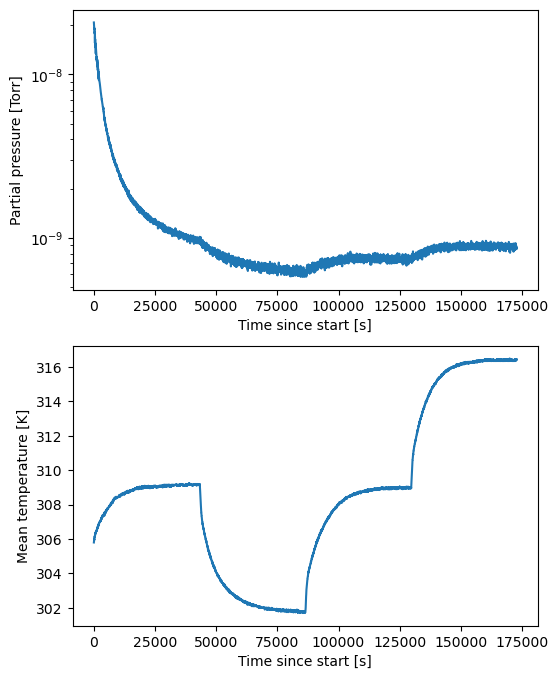

In [3]:
from data_analysis_script import Dataset
run_label = '2023-10-30' ## Change this to look at different runs
d = Dataset(run_label=run_label, gases=['O2'])
d.GetData()
d.PlotSingleGas('O2')

In [4]:
time = np.array(d.data['O2']['Exposure_time'])
temp = np.array(d.data['O2']['Mean_temp']) #['Mean_temp'])
p = np.array(d.data['O2']['Partial_pressure'])

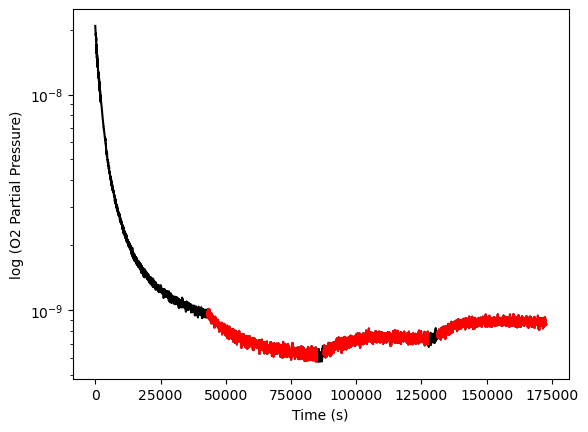

In [18]:
time_slices = [[43000, 85000],
               [87500, 127500],
               [131000, 175000]]

plt.semilogy(time, p, 'k') # Plot the logarithm (base 10) of the partial pressure of O2 (oxygen) against time. 
plt.ylabel('log (O2 Partial Pressure)') 
plt.xlabel('Time (s)')

for ts in time_slices:
    gpts = (time > ts[0]) & (time < ts[1])
    plt.semilogy(time[gpts], p[gpts],'r')
# plt.ylim(2e-9, 3e-8)
#plt.xlim(12e4, 14e4)
plt.show()

# Fit to fitfunction (no log, no short)

In [1]:
def plot_single(x,y,bp, log=False):
    plt.figure(figsize=(5,5))
    plt.subplot(2,1,1)
    plt.plot(x[0,:],y,'k')
    if(log):
        plt.plot(x[0,:], d.logfitfunction(x, *bp), 'r')
    else:
        plt.plot(x[0,:], d.fitfunction(x, *bp), 'r')
    plt.ylabel('Pressure [mbar]')
    plt.xlabel("Time [s]")

    # to plot the temperature 
#     plt.subplot(2,1,2)
#     plt.plot(x[0,:],x[1,:],'k')
#     plt.ylabel('Temperature [K]')
#     plt.xlabel("Time [s]")
        
    plt.show()

## fit each time individually
im.reload(da)

time_slices = [[44000, 85000],
               [87500, 127500],
               [131000, 175000]]

fit_params = np.zeros((len(time_slices), 3))

for j, ts in enumerate(time_slices):
    gpts = (time > ts[0]) & (time < ts[1])

    tT = np.vstack((time[gpts]-time[gpts][0], temp[gpts]))
    y = p[gpts]
    
    spars = [4.48859880e-04, 3.45969798e+03, 3.98032858e-01]
    bp, bc = curve_fit(d.fitfunction, tT, y, p0=spars)

    print(bp)
    #bp = spars
    fit_params[j,:] = bp

    plot_single(tT, y, bp)

# To visually see how the parameters change from slice to slice   

# plt.figure()
# plt.subplot(3,1,1)
# plt.semilogy([1,2,3], fit_params[:,0], 'ko-')
# plt.ylabel("A")

# plt.subplot(3,1,2)
# plt.semilogy([1,2,3], fit_params[:,1], 'bo-')
# plt.ylabel("B")

# plt.subplot(3,1,3)
# plt.semilogy([1,2,3], fit_params[:,2], 'ro-')
# plt.ylabel("C")
# plt.xlabel("Time period")
# plt.gca().set_xticks([1,2,3])
# plt.subplots_adjust(hspace=0)
print(fit_params)
plt.show()

NameError: name 'im' is not defined

# fit to log.fitfunction

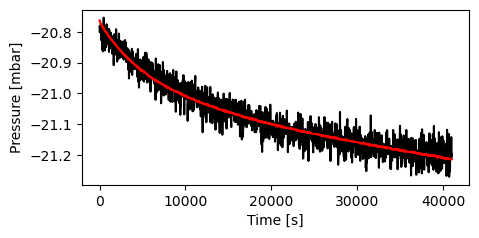

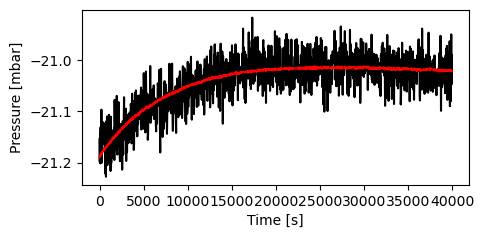

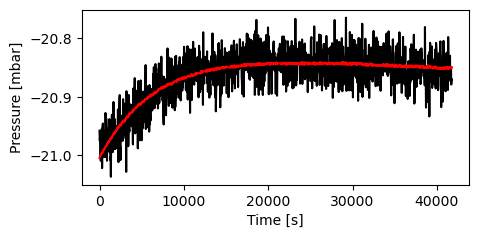

[[-6.48669736e+00  4.38794751e+03  9.39477389e+00]
 [-9.11244693e+00  3.67029640e+03  1.06917765e-01]
 [-9.50665508e+00  3.58057228e+03  5.51702322e-02]]


In [20]:
## now try a fit to the log

fit_params = np.zeros((len(time_slices), 3))

for j, ts in enumerate(time_slices):
    gpts = (time > ts[0]) & (time < ts[1])

    tT = np.vstack((time[gpts]-time[gpts][0], temp[gpts]))
    y = p[gpts]
    
    spars = [np.log(4.48859880e-04), 3.45969798e+03, 3.98032858e-01]
    bp, bc = curve_fit(d.logfitfunction, tT, np.log(y), p0=spars)

    fit_params[j,:] = bp

    plot_single(tT, np.log(y), bp, log=True)
    
# To visually see how the parameters change from slice to slice   

# plt.figure()
# plt.subplot(3,1,1)
# plt.plot([1,2,3], fit_params[:,0], 'ko-')
# plt.ylabel("A")

# plt.subplot(3,1,2)
# plt.semilogy([1,2,3], fit_params[:,1], 'bo-')
# plt.ylabel("B")

# plt.subplot(3,1,3)
# plt.semilogy([1,2,3], fit_params[:,2], 'ro-')
# plt.ylabel("C")
# plt.xlabel("Time period")
# plt.gca().set_xticks([1,2,3])
# plt.subplots_adjust(hspace=0)
print(fit_params)
plt.show()

# fit to log.fitfunction but combining chi-squared of each slice

      fun: 2.2304802271648914
 hess_inv: array([[ 2.13891257e-03,  1.84481245e-03,  4.40965414e-01,
         1.83235175e-03],
       [ 1.84481245e-03,  2.34963972e-03,  4.28887400e-01,
         2.55040367e-03],
       [ 4.40965414e-01,  4.28887400e-01,  1.36929359e+02,
        -1.71146204e-02],
       [ 1.83235175e-03,  2.55040367e-03, -1.71146204e-02,
         1.04688300e-02]])
      jac: array([-1.69873238e-06, -2.38418579e-06, -8.04662704e-07,  1.96695328e-06])
  message: 'Optimization terminated successfully.'
     nfev: 330
      nit: 46
     njev: 66
   status: 0
  success: True
        x: array([-9.43285142e+00, -9.53031974e+00,  3.57273323e+03,  5.83446564e-02])


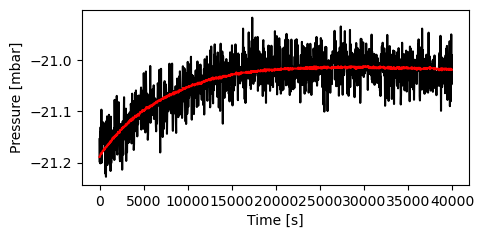

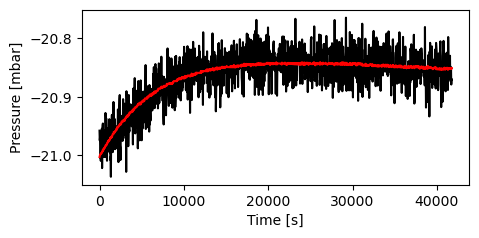

In [21]:
# Define the function to calculate the combined chi-squared value by 
# evaluating the goodness of fit for multiple datasets simultaneously
def combined_chisq(params, data_dict):
    # Number of datasets
    ndsets = len(data_dict.keys())

    # Separate the parameters: amplitude for each dataset and common parameters b and c.
    amp_vec = params[:ndsets]  # Amplitude parameters, unique for each dataset.
    b, c = params[-2], params[-1]  # Common parameters for all datasets.

    tot_chisq = 0  # Initialize the total chi-squared value.

    # Iterate over each dataset to calculate its chi-squared value.
    for n in range(ndsets):
        cdat = data_dict[n]  # Current dataset.
        # Calculate the chi-squared value for the current dataset.
        curr_chisq = np.sum((d.logfitfunction(cdat[0], amp_vec[n], b, c) - np.log(cdat[1]))**2)
        # Check for NaN values and handle them by adding infinity to the total chi-squared.
        if not np.isnan(curr_chisq):
            tot_chisq += curr_chisq
        else:
            tot_chisq += np.inf

    return tot_chisq  # Return the total chi-squared value.

# Define time slices for the analysis.
time_slices = [#[43000, 85000],
               [87500, 127500],
               [131000, 175000]]

# Dictionary to store data for each time slice.
combined_data = {}

# Prepare the data for each time slice and store in the dictionary.
for j, ts in enumerate(time_slices):
    # Get the data points within the current time slice.
    gpts = (time > ts[0]) & (time < ts[1])
    # Stack the time and temperature data for the current time slice.
    tT = np.vstack((time[gpts]-time[gpts][0], temp[gpts]))
    # Get the corresponding pressure data.
    y = p[gpts]
    # Store the data in the dictionary.
    combined_data[j] = [tT, y]

# Initial parameters for the optimization.
spars = [-7.74881756e+00, -8.04881756e+00, 3.44741784e+03, 3.82129198e-01]

# Perform the optimization to minimize the combined chi-squared value.
res = minimize(combined_chisq, spars, args=(combined_data))

# Extract the best-fit parameters.
bp = res.x
print(res)  # Print the result of the optimization.

# Plot the fitted model for each time slice.
for j in range(len(time_slices)):
    # Plot the data and the fitted model for the current time slice.
    plot_single(combined_data[j][0], np.log(combined_data[j][1]), [bp[j], bp[-2], bp[-1]], log=True)

# MCMC

In [29]:
## try MCMC
import emcee as mc

In [30]:
spars = np.array([5e-4, 4.48859880e-04, 3.45969798e+03, 3.98032858e-01])
pos = spars * (1 + 0.1*np.random.randn(8, 4))
nwalkers, ndim = pos.shape

sampler = mc.EnsembleSampler(nwalkers, ndim, combined_chisq, args=(combined_data,))
sampler.run_mcmc(pos, 500, progress=True)

  3%|▎         | 14/500 [00:00<00:03, 135.19it/s]/home/imn7/.conda/envs/outgassing_env/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
100%|██████████| 500/500 [00:01<00:00, 255.39it/s]


State([[-3.02719796e+40 -4.51941342e+40  9.68410276e+46 -1.68789012e+43]
 [ 8.72471542e-02  1.59306391e-01 -3.37366941e+05  5.29498129e+01]
 [ 5.51267092e-02  9.11447878e-02 -1.50432779e+05  2.80283745e+01]
 [-5.99308148e+00  1.15318493e+01 -2.08597300e+07 -1.93794804e+03]
 [ 3.33810117e-02  6.16002710e-02 -1.24927471e+05  2.03023287e+01]
 [ 5.05859357e-02  7.51225246e-02 -1.72761395e+05  3.12084281e+01]
 [ 1.89882034e+04  2.21945441e+04 -4.87620830e+10  1.00886067e+07]
 [ 3.33923429e-02  6.38846645e-02 -1.05779012e+05  1.93303933e+01]], log_prob=[1.2168886e+97           inf           inf           inf           inf
           inf           inf           inf], blobs=None, random_state=('MT19937', array([3048639472,  433461478, 2364608137, 2124346490,  585351846,
       2475184756, 2156832861, 3497843604, 1369601521, 1925699869,
        475590872,  290211779, 2722477291, 1266535624,  964816629,
        817840060,  591755901, 3946701074,  639284391, 4108127381,
       3558075712, 3775498

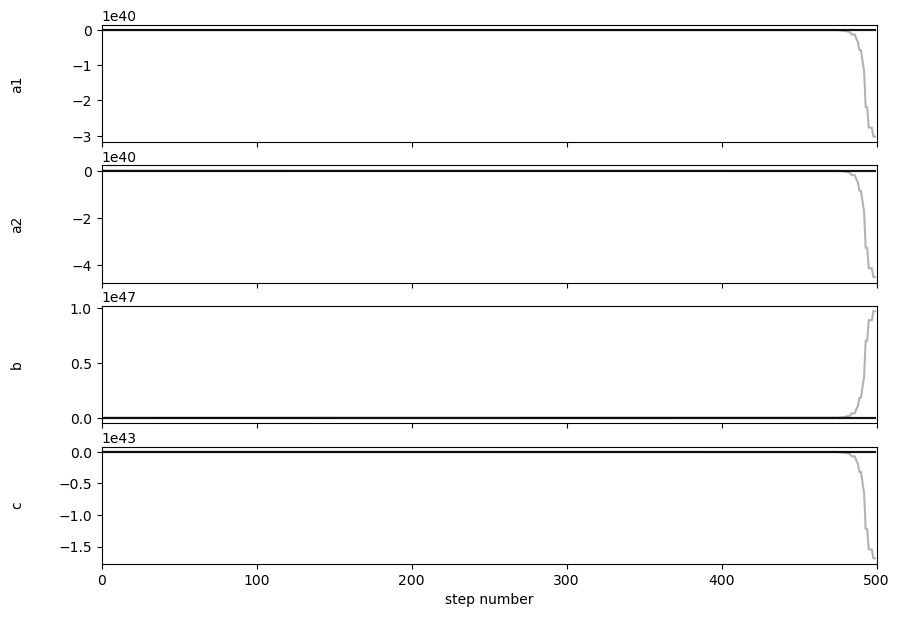

In [31]:
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["a1", "a2", "b", "c"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [32]:
## now try in the short time limit

def plot_single_short(x,y, bp, log=False):
    plt.figure(figsize=(8,8))
    plt.subplot(2,1,1)
    plt.plot(x[0,:],y,'k')
    if(log):
        plt.plot(x[0,:], d.logfitfunction(x, *bp), 'r')
    else:
        plt.plot(x[0,:], d.fitfunction_short(x, *bp), 'r')
    plt.ylabel('Pressure [mbar]')
    plt.xlabel("Time [s]")
    plt.show()
    
def combined_chisq_short(params, data_dict):
    
    ndsets = len(data_dict.keys())

    a, b, c, d = params[0], params[1], params[2], params[3]

    tot_chisq = 0
    sig = 0.5e-9 ## error on values

    for n in range(ndsets):
        cdat = data_dict[n]
        curr_chisq = np.sum(((ds.fitfunction_short(cdat[0], a, b, c, d) - cdat[1])/sig)**2)
        if(not np.isnan(curr_chisq)):
            tot_chisq += curr_chisq
        else:
            tot_chisq += np.inf

    return tot_chisq

[ 4.02659597e-06  1.12362228e+04 -3.44611801e+04  1.82795655e-01]


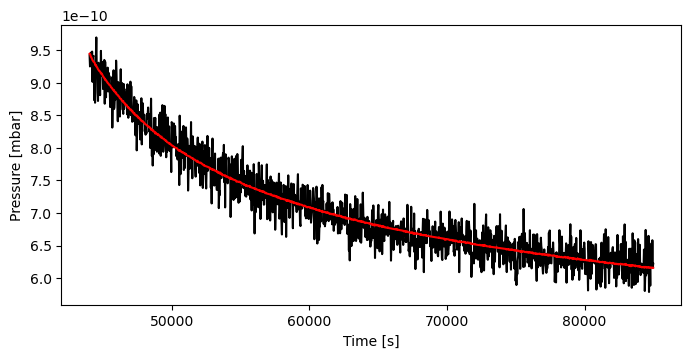

[2.57899880e+01 4.26203175e+03 9.71872703e+05 8.76073762e-01]


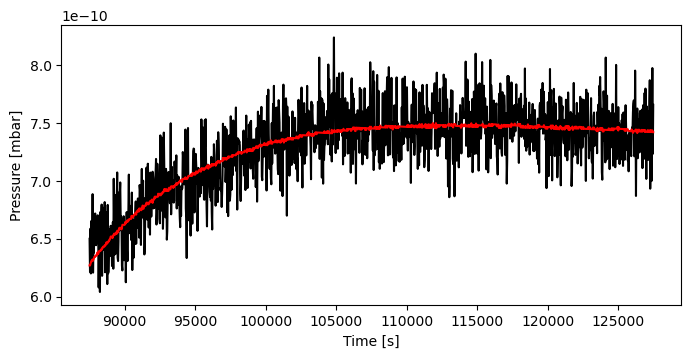

[7.09686252e+00 4.45505504e+03 9.95366408e+05 8.13181614e-01]


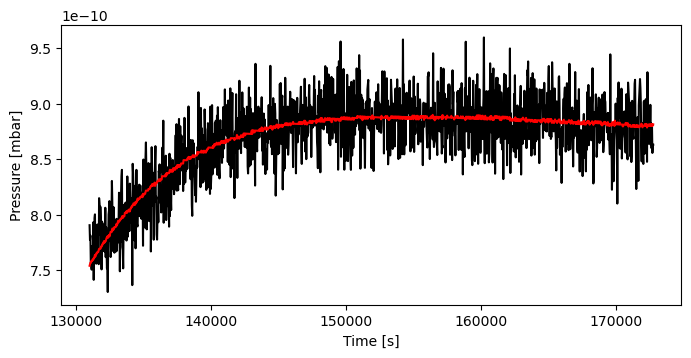

In [33]:
## fit each time individually
im.reload(da)
time_slices = [[44000, 85000],
               [87500, 127500],
               [131000, 175000]]

fit_params = np.zeros((len(time_slices), 3))

for j, ts in enumerate(time_slices):
    gpts = (time > ts[0]) & (time < ts[1])

    tT = np.vstack((time[gpts], temp[gpts]))
    y = p[gpts]
    
    spars = [4.03352926e-06, 1.12386982e+04, -3.44588211e+04, 1.82800022e-01]
    bp, bc = curve_fit(d.fitfunction_short, tT, y, p0=spars, method='lm', maxfev=90000)

    print(bp)
    spars = bp
    #bp = spars

    plot_single_short(tT, y, bp)
    
    

In [34]:
def combined_chisq_short(params, data_dict):
    
    ndsets = len(data_dict.keys())

    a, b, c, d = params[0], params[1], params[2], params[3]

    tot_chisq = 0
    sig = 0.5e-9 ## error on values

    for n in range(ndsets):
        cdat = data_dict[n]
        curr_chisq = np.sum(((ds.fitfunction_short(cdat[0], a, b, c, d) - cdat[1])/sig)**2)
        if(not np.isnan(curr_chisq)):
            tot_chisq += curr_chisq
        else:
            tot_chisq += np.inf

    return tot_chisq

In [35]:
## now try to fit all together

time_slices = [[15000, 43000],
               [44000, 85000],
               [87500, 127500],
               [131000, 175000]]

combined_data = {}

for j,ts in enumerate(time_slices):
    gpts = (time > ts[0]) & (time < ts[1])

    tT = np.vstack((time[gpts], temp[gpts]))
    y = p[gpts]

    combined_data[j] = [tT, y]

spars = [1.51773882e-03,  4.15378586e+03, -3.30925990e+02, 0.6]
res = minimize(combined_chisq_short, spars, args=(combined_data))

bp = res.x
print(res)
#bp = spars

for j in range(len(time_slices)):
    print(j)
    plot_single_short(combined_data[j][0], combined_data[j][1], bp)

plt.figure()
plt.semilogy(time, p, 'k')
for j in range(len(time_slices)):
    tvals = combined_data[j][0][0]
    plt.plot(tvals, ds.fitfunction_short(combined_data[j][0], *bp),'r')
# plt.ylim(4.5e-9, 30e-9)
plt.ylabel('Pressure [mbar]')
plt.xlabel("Time [s]")


NameError: name 'ds' is not defined

In [ ]:
tvec = np.logspace(-6,0,1000)

maxn = 200

fval = np.zeros_like(tvec)
for n in range(maxn):
    fval += np.exp(-(np.pi*(2*n+1))**2*tvec)

plt.figure()
plt.loglog(tvec, fval)

In [ ]:
pos = bp * (1 + 1e-3*np.random.randn(16, len(spars)))
nwalkers, ndim = pos.shape

ffn = lambda p,d: -combined_chisq_short(p,d)

sampler = mc.EnsembleSampler(nwalkers, ndim, ffn, args=(combined_data,))
sampler.run_mcmc(pos, 5000, progress=True)

In [ ]:
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["a", "b", "c", "d"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [36]:
import corner

flat_samples = sampler.get_chain(discard=500, thin=15, flat=True)
print(flat_samples.shape)

fig = corner.corner(flat_samples, labels=labels)

(0, 4)


/home/imn7/.conda/envs/outgassing_env/lib/python3.7/site-packages/arviz/data/base.py:226: UserWarning: More chains (1) than draws (0). Passed array should have shape (chains, draws, *shape)
  UserWarning,


AssertionError: I don't believe that you want more dimensions than samples!

In [ ]:
plt.figure()
plt.semilogy(time, p, 'k')

inds = np.random.randint(len(flat_samples), size=10)
for ind in inds:
    sample = flat_samples[ind]
    for j in range(len(time_slices)):
        tvals = combined_data[j][0][0]
        plt.plot(tvals, ds.fitfunction_short(combined_data[j][0], *sample), 'r', alpha=0.5)

# plt.ylim(4.5e-9, 6e-9)
plt.ylabel('Pressure [mbar]')
plt.xlabel("Time [s]")

In [37]:
from IPython.display import display, Math

CI = 10 ## L/s
Area = 0.01 ## m^2
mbar_to_Pa = 100
K = 0.22
p_atm = 1.01e5 #Pa
m_to_cm = 100
L_to_m3 = 1e-3

mcmc_D0 = np.percentile((flat_samples[:, 0]*CI*mbar_to_Pa*L_to_m3/(K*p_atm*Area) * m_to_cm)**2, [16, 50, 84])
mcmc_Ea = np.percentile(flat_samples[:, 1], [16, 50, 84])

print("D0 [cm^2/s]: ", mcmc_D0)
print("Activation energy [K]: ", mcmc_Ea)

IndexError: index -1 is out of bounds for axis 0 with size 0